<a href="https://colab.research.google.com/github/NazwaAuliaRakhma/Tubesnazwa_Pengenalan_Pola/blob/main/Tubes_Pengenalan_Pola_Nazwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = '/content/drive/MyDrive/SEMESTER 6/Pengenalan pola/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory dengan training cat
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with dengan training dog
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with dengan validation cat
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with dengan validation dog
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# melihat isi data
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.100.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.0.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameter untuk grafik untuk output images 4x4 configuration
nrows = 4
ncols = 4

# Index iterasi images
pic_index = 0

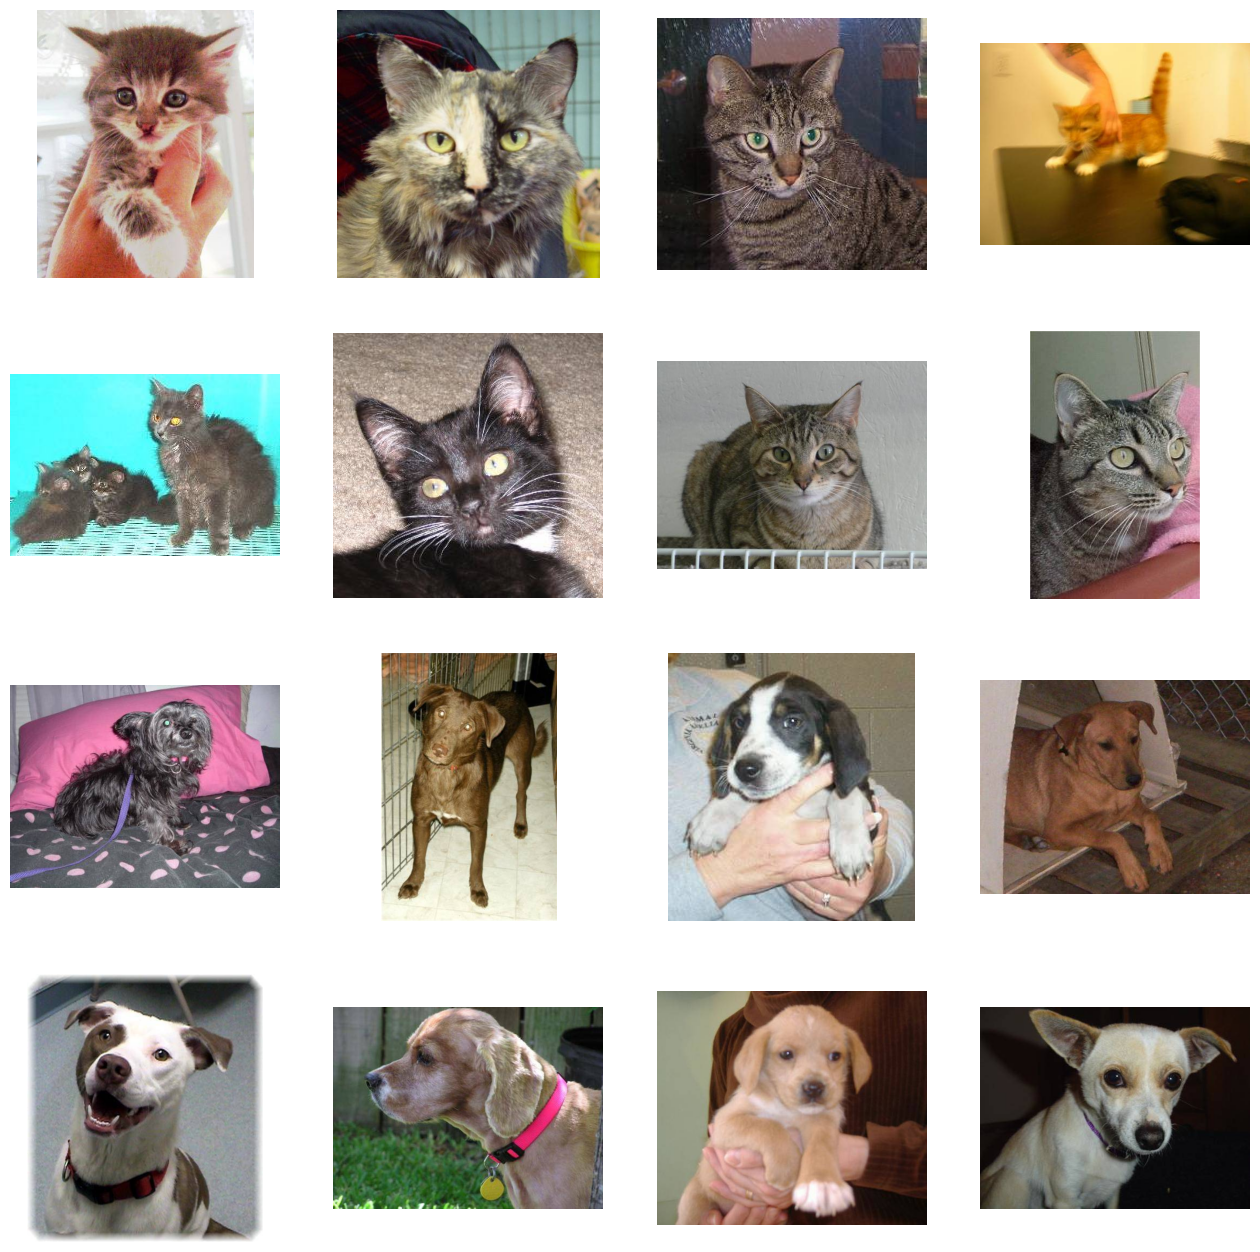

In [ ]:
# Set up matplotlib fit ukurannya agar sesuai dengan foto 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot, indeks subplot dimulai dari 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Jangan tampilkan garis kisi

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# setting arsitektur CNN
# input feature map 150x150x3: 150x150 untuk pixels dan 3 untuk warna channels R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# Konvolusi pertama mengekstrak 16 filter berukuran 3x3 (diikuti lapisan max-pooling -- jendela 2x2)
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Konvolusi kedua mengekstrak 32 filters berukuran 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Konvolusi ketiga mengekstrak 64 filters berukuran 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Setting arsitektur CNN (Fully Connected)

In [ ]:
# Mengubah peta fitur menjadi tensor 1-dim untuk menambahkan lapisan fully connected
x = layers.Flatten()(x)

# Membuat lapisan fully connected dengan aktivasi ReLU dan 512 unit tersembunyi
x = layers.Dense(512, aktivasi='relu')(x)

# Membuat lapisan output dengan satu node dan aktivasi sigmoid
output = layers.Dense(1, aktivasi='sigmoid')(x)

# Membuat model:
model = Model(img_input, output)

In [ ]:
# compile cnn
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Setting preparasi dataset

In [ ]:
# preparation dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Semua gambar akan diubah skalanya sebesar 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # Ini direktori untuk pelatihan
        target_size=(150, 150),  # emua gambar akan diubah ukurannya menjadi 150x150
        batch_size=20,
        # penggunaan binary_crossentropy loss jadi butuh binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Proses training, bisa membutuhkan waktu beberapa menit

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

<ipython-input-13-91d346d1b720>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
100/100 - 697s - loss: 0.6969 - acc: 0.5555 - val_loss: 0.6575 - val_acc: 0.6190 - 697s/epoch - 7s/step
Epoch 2/15
100/100 - 68s - loss: 0.6384 - acc: 0.6375 - val_loss: 0.6299 - val_acc: 0.6340 - 68s/epoch - 680ms/step
Epoch 3/15
100/100 - 73s - loss: 0.5790 - acc: 0.6980 - val_loss: 0.5609 - val_acc: 0.7210 - 73s/epoch - 732ms/step
Epoch 4/15
100/100 - 70s - loss: 0.5103 - acc: 0.7560 - val_loss: 0.5430 - val_acc: 0.7270 - 70s/epoch - 696ms/step
Epoch 5/15
100/100 - 69s - loss: 0.4376 - acc: 0.7910 - val_loss: 0.5325 - val_acc: 0.7440 - 69s/epoch - 692ms/step
Epoch 6/15
100/100 - 71s - loss: 0.3649 - acc: 0.8320 - val_loss: 0.5856 - val_acc: 0.7440 - 71s/epoch - 713ms/step
Epoch 7/15
100/100 - 71s - loss: 0.2897 - acc: 0.8690 - val_loss: 1.0214 - val_acc: 0.6580 - 71s/epoch - 706ms/step
Epoch 8/15
100/100 - 68s - loss: 0.2067 - acc: 0.9190 - val_loss: 0.7012 - val_acc: 0.7390 - 68s/epoch - 677ms/step
Epoch 9/15
100/100 - 69s - loss: 0.1523 - acc: 0.9445 - val_loss: 0.7537 

Menampilkan hasil tiap langkah

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


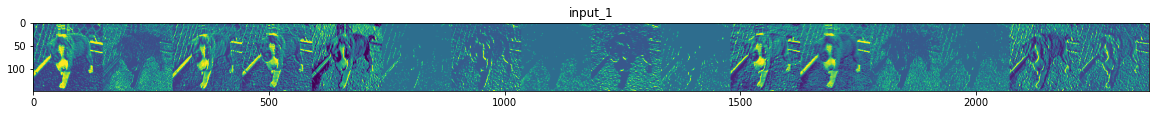

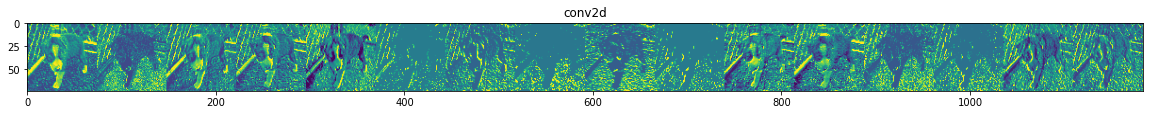

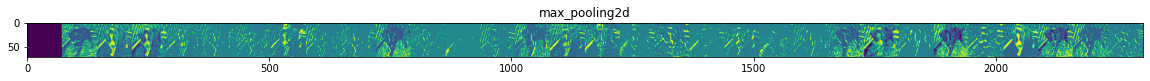

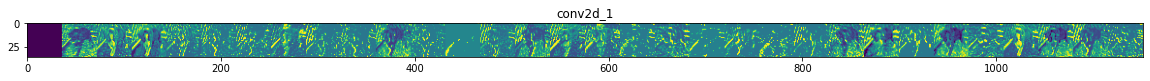

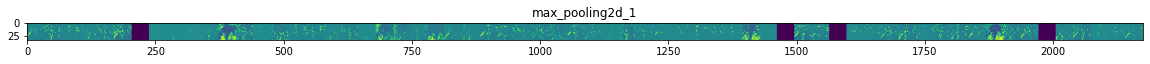

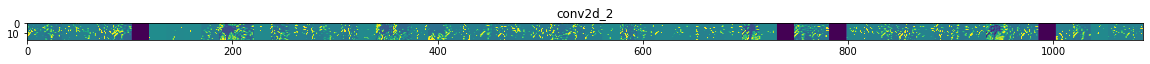

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# representations semua layers
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# siapkan gambar input random dari kucing atau anjing dari set pelatihan.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)  # Numpy array dengan ukuran (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array dengan ukuran (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

successive_feature_maps = visualization_model.predict(x)

# Ini adalah nama-nama layer untuk menjadikannya sebagai bagian dari plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    # The feature map berukuran (1, size, size, n_features)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Menampilkan grafik selama pelatihan

Text(0.5, 1.0, 'Training and validation loss')

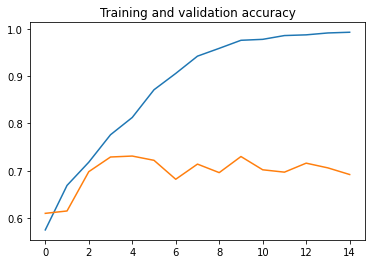

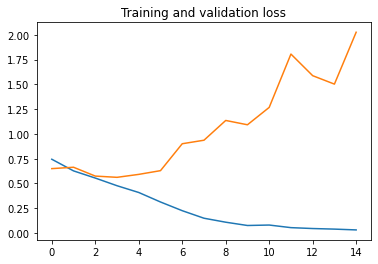

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')